In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df = pd.read_csv("kdrama_DATASET.csv") 
df.head()

,Rank,Title,Year of release,Number of Episodes,Rating,Description,Genre,Tags,Actors
0,#1,Move to Heaven,2021,10,9.2,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...","Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju..."
1,#2,Twinkling Watermelon,2023,16,9.2,"In 2023, high school student Eun Gyeol, a CODA...","Romance, Youth, Drama, Fantasy","Time Travel, Child From The Future, Sign Langu...","Ha Eun-Gyeol, Ha Yi-Chan, Choi Se-Kyung, Yoon ..."
2,#3,Moving,2023,20,9.1,"Kim Bong Seok, Jang Hui Su, and Lee Gang Hun, ...","Action, Thriller, Mystery, Supernatural","Graphic Violence, Supernatural Power, Multiple...","Ryu Seung Ryong, Han Hyo Joo, Zo In Sung"
3,#4,The Trauma Code: Heroes on Call,2025,8,9.1,"Baek Gang Hyeok, a genius trauma surgeon with ...","Action, Comedy, Drama, Medical","Surgeon Male Lead, Hospital Setting, Mentor-Me...","Ju Ji Hoon, Choo Young Woo, Ha Young, Yoon Gyu..."
4,#5,Flower of Evil,2020,16,9.1,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...","Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ..."


In [89]:
df.tail()

,Rank,Title,Year of release,Number of Episodes,Rating,Description,Genre,Tags,Actors
345,#346,Oh! Youngsim,2023,10,6.9,"Oh Young Sim, a 30-something TV variety show P...","Comedy, Romance","Childhood Acquaintances Reuniting, Producer Fe...","Song Ha Yoon, Lee Dong Hae, Lee Min Jae, Ryu H..."
346,#347,DNA Lover,2024,16,6.9,"So Jin, a genetic researcher who loves DNA, de...","Comedy, Romance, Melodrama","Medical Research, Medical, Columnist Female Le...","Choi Si Won, Jung In Sun, Jung Eugene, Lee Tae..."
347,#348,Our Love Triangle,2024,10,6.9,"Hae Rin, a university student, finds herself t...","Romance, Youth","Tsundere Male Lead, Ex Comes Back, Passionate ...","Gong Chan, Ahn Se Min, Kim Si Gyeong"
348,#349,The Brave Yong Su Jeong,2024,124,6.8,"Yong Su Jeong has a refreshing charm, which he...","Romance, Drama, Melodrama","Guest House Setting, Adoptive Father-Adoptive ...","Uhm Hyun Kyung, Seo Joon Young, Im Ju Eun, Kwo..."
349,#350,Goodbye Earth,2024,12,6.4,An asteroid is on course to crash into Earth i...,"Thriller, Psychological, Drama, Sci-Fi","Former Teacher Female Lead, Protective Female ...","Ahn Eun Jin, Yoo Ah In, Jeon Sung Woo, Kim Yoo..."


In [129]:
df.isnull().sum()

Rank                  0
Title                 0
Year of release       0
Number of Episodes    0
Rating                0
Description           0
Genre                 0
Tags                  0
Actors                0
Length Category       0
Primary Genre         0
Genre List            0
dtype: int64

In [131]:
df.groupby('Genre')[['Rating', 'Number of Episodes']].mean()


,Rating,Number of Episodes
Genre,,
"Action, Comedy, Romance, Melodrama",8.7,16.0
"Action, Historical, Drama, Political",8.8,50.0
"Action, Historical, Romance, Political",8.6,28.0
"Action, Military, Comedy, Drama",8.8,6.0
"Action, Mystery, Comedy, Crime",8.7,40.0
...,...,...
"Thriller, Mystery, Youth, Drama",7.5,10.0
"Thriller, Psychological, Drama, Sci-Fi",6.4,12.0
"Thriller, Romance, Drama, Melodrama",8.5,16.0


In [133]:
print("Unique Genres:", df['Genre'].dropna().unique())

Unique Genres: ['Life,  Drama,  Family ' 'Romance, Youth, Drama, Fantasy'
 'Action, Thriller, Mystery, Supernatural'
 'Action, Comedy, Drama, Medical'
 'Thriller,  Romance,  Crime,  Melodrama '
 'Friendship,  Romance,  Life,  Medical '
 'Psychological,  Life,  Drama,  Family '
 'Comedy,  Romance,  Youth,  Family ' 'Action, Youth, Drama'
 'Comedy,  Crime,  Life,  Drama ' 'Music, Comedy, Romance, Fantasy'
 'Action, Historical, Romance, Fantasy ' 'Action, Thriller, Comedy, Youth'
 'Law, Romance, Life, Drama ' 'Historical,  Mystery,  Comedy,  Romance '
 'Thriller,  Mystery,  Psychological,  Melodrama '
 'Psychological,  Comedy,  Romance,  Drama '
 'Military,  Comedy,  Romance,  Political '
 'Comedy,  Law,  Crime,  Drama ' 'Friendship,  Life,  Drama,  Family '
 'Thriller,  Mystery,  Sci-Fi '
 'Military,  Historical,  Romance,  Melodrama '
 'Action,  Thriller,  Drama,  Fantasy '
 'Thriller,  Historical,  Horror,  Supernatural '
 'Comedy, Life, Drama, Family' 'Thriller, Drama, Melodrama'
 'My

In [135]:
df.describe()

,Year of release,Number of Episodes,Rating
count,350.000000,350.000000,350.000000
mean,2019.808571,18.254286,8.364857
std,3.713282,14.565962,0.454704
min,2003.000000,1.000000,6.400000
25%,2018.000000,12.000000,8.300000
50%,2020.000000,16.000000,8.400000
75%,2023.000000,16.000000,8.600000
max,2025.000000,133.000000,9.200000


In [137]:
def classify_length(episodes):
    if episodes < 10:
        return 'Mini-Series'
    elif episodes < 30:
        return 'Standard'
    else:
        return 'Long'

df['Length Category'] = df['Number of Episodes'].apply(classify_length)
df[['Title', 'Number of Episodes', 'Length Category']].head()


,Title,Number of Episodes,Length Category
0,Move to Heaven,10,Standard
1,Twinkling Watermelon,16,Standard
2,Moving,20,Standard
3,The Trauma Code: Heroes on Call,8,Mini-Series
4,Flower of Evil,16,Standard


In [139]:
df['Year of release'].value_counts().sort_index()


Year of release
2003     1
2006     1
2007     1
2009     1
2010     1
2011     4
2012     7
2013    11
2014     7
2015     9
2016    13
2017    27
2018    24
2019    37
2020    35
2021    39
2022    33
2023    42
2024    44
2025    13
Name: count, dtype: int64

In [141]:
df.sort_values(by='Rating', ascending=False).head(10)


,Rank,Title,Year of release,Number of Episodes,Rating,Description,Genre,Tags,Actors,Length Category,Primary Genre,Genre List
0,#1,Move to Heaven,2021,10,9.2,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...","Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...",Standard,Life,"[Life, Drama, Family]"
1,#2,Twinkling Watermelon,2023,16,9.2,"In 2023, high school student Eun Gyeol, a CODA...","Romance, Youth, Drama, Fantasy","Time Travel, Child From The Future, Sign Langu...","Ha Eun-Gyeol, Ha Yi-Chan, Choi Se-Kyung, Yoon ...",Standard,Romance,"[Romance, Youth, Drama, Fantasy]"
2,#3,Moving,2023,20,9.1,"Kim Bong Seok, Jang Hui Su, and Lee Gang Hun, ...","Action, Thriller, Mystery, Supernatural","Graphic Violence, Supernatural Power, Multiple...","Ryu Seung Ryong, Han Hyo Joo, Zo In Sung",Standard,Action,"[Action, Thriller, Mystery, Supernatural]"
3,#4,The Trauma Code: Heroes on Call,2025,8,9.1,"Baek Gang Hyeok, a genius trauma surgeon with ...","Action, Comedy, Drama, Medical","Surgeon Male Lead, Hospital Setting, Mentor-Me...","Ju Ji Hoon, Choo Young Woo, Ha Young, Yoon Gyu...",Mini-Series,Action,"[Action, Comedy, Drama, Medical]"
4,#5,Flower of Evil,2020,16,9.1,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...","Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...",Standard,Thriller,"[Thriller, Romance, Crime, Melodrama]"
5,#6,Hospital Playlist,2020,12,9.1,The stories of people going through their days...,"Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...","Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...",Standard,Friendship,"[Friendship, Romance, Life, Medical]"
6,#7,Hospital Playlist 2,2021,12,9.1,Everyday is extraordinary for five doctors and...,"Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...","Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...",Standard,Friendship,"[Friendship, Romance, Life, Medical]"
7,#8,My Mister,2018,16,9.1,Park Dong Hoon is a middle-aged engineer who i...,"Psychological, Life, Drama, Family","Age Gap, Nice Male Lead, Strong Female Lead, H...","Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...",Standard,Psychological,"[Psychological, Life, Drama, Family]"
8,#9,Reply 1988,2015,20,9.1,"Five childhood friends, who all live in the sa...","Comedy, Romance, Youth, Family","Neighbors, Slice Of Life, Childhood Friends, M...","Lee Hye Ri, Go Kyung Pyo, Ryu Joon Yeol, Park ...",Standard,Comedy,"[Comedy, Romance, Youth, Family]"
9,#10,Weak Hero Class 1,2022,8,9.1,Yeon Shi Eun is a model student who ranks at t...,"Action, Youth, Drama","Bromance, Smart Male Lead, Violence, School Bu...","Park Ji Hoon, Choi Hyun Wook, Hong Kyung, Kim ...",Mini-Series,Action,"[Action, Youth, Drama]"


In [143]:
df[df['Number of Episodes'] == df['Number of Episodes'].max()]


,Rank,Title,Year of release,Number of Episodes,Rating,Description,Genre,Tags,Actors,Length Category,Primary Genre,Genre List
229,#230,Ugly Alert,2013,133,8.3,The story of a man named Gong Joon Soo who sac...,"Business, Romance, Melodrama","Rich Woman/Poor Man, Nice Male Lead, Strong Fe...","Im Joo Hwan, Kang So Ra, Kang Byul, Choi Tae...",Long,Business,"[Business, Romance, Melodrama]"


In [145]:
high_rated = df[df['Rating'] >= 8.5]
print(high_rated[['Title', 'Rating']])


                                Title  Rating
0                      Move to Heaven     9.2
1                Twinkling Watermelon     9.2
2                              Moving     9.1
3    The Trauma Code: Heroes on Call      9.1
4                      Flower of Evil     9.1
..                                ...     ...
154                     Pyramid Game      8.5
155                All of Us Are Dead     8.5
156                   Extracurricular     8.5
157                      Yumi's Cells     8.5
171                Parasyte: The Grey     8.5

[159 rows x 2 columns]


In [147]:
sns.set(style="whitegrid")

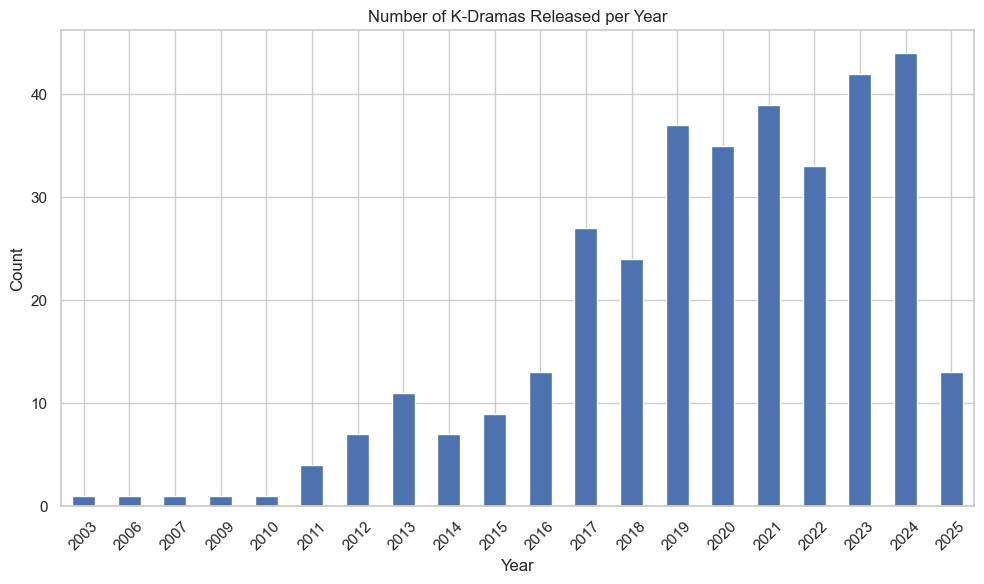

In [149]:
plt.figure(figsize=(10, 6))
df['Year of release'].value_counts().sort_index().plot(kind='bar')
plt.title("Number of K-Dramas Released per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


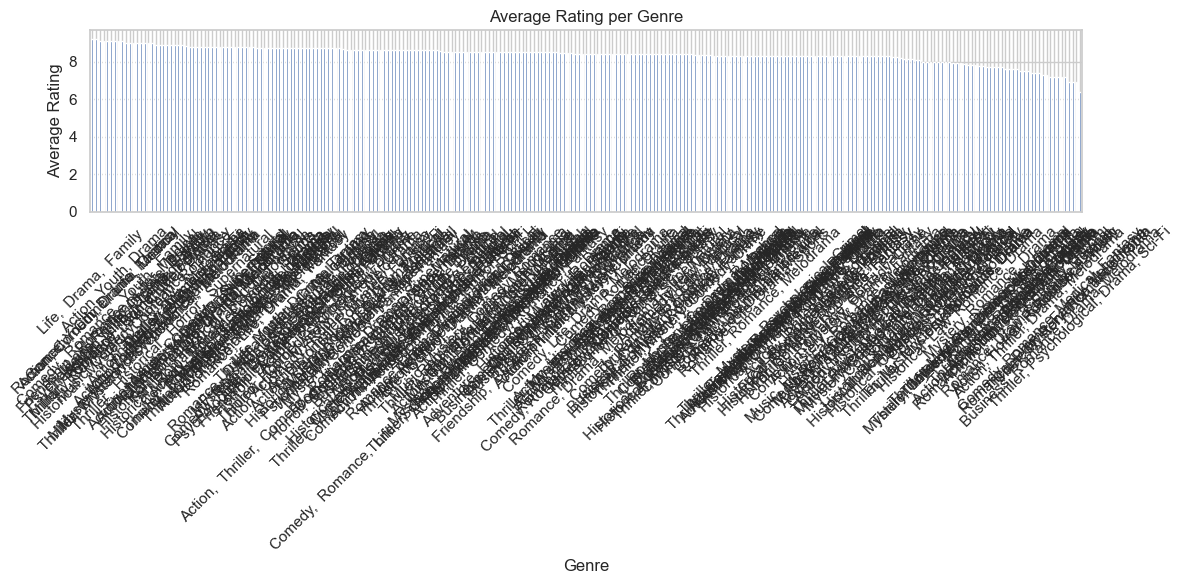

In [150]:
plt.figure(figsize=(12, 6))
df.groupby('Genre')['Rating'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title("Average Rating per Genre")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


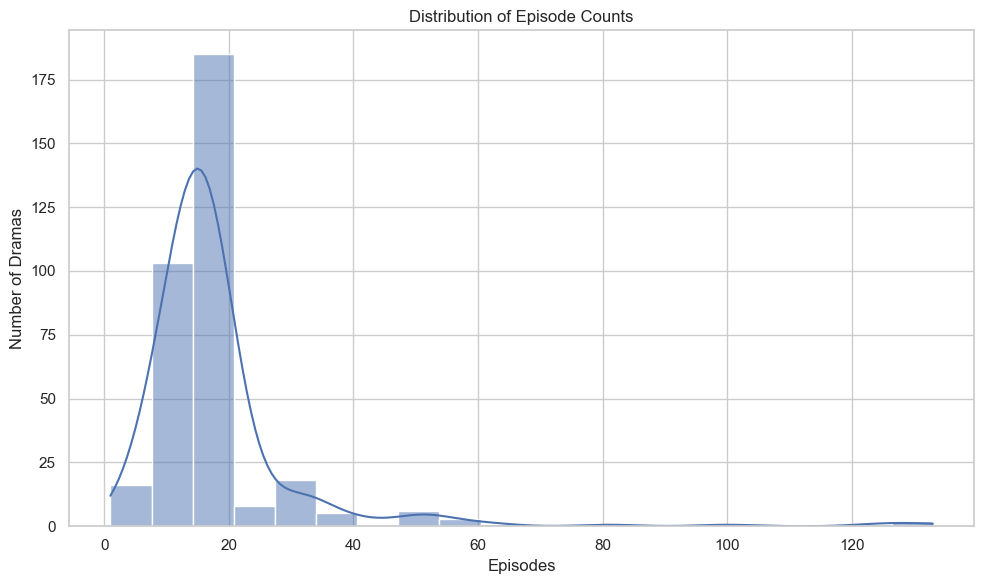

In [152]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Number of Episodes'], bins=20, kde=True)
plt.title("Distribution of Episode Counts")
plt.xlabel("Episodes")
plt.ylabel("Number of Dramas")
plt.tight_layout()
plt.show()


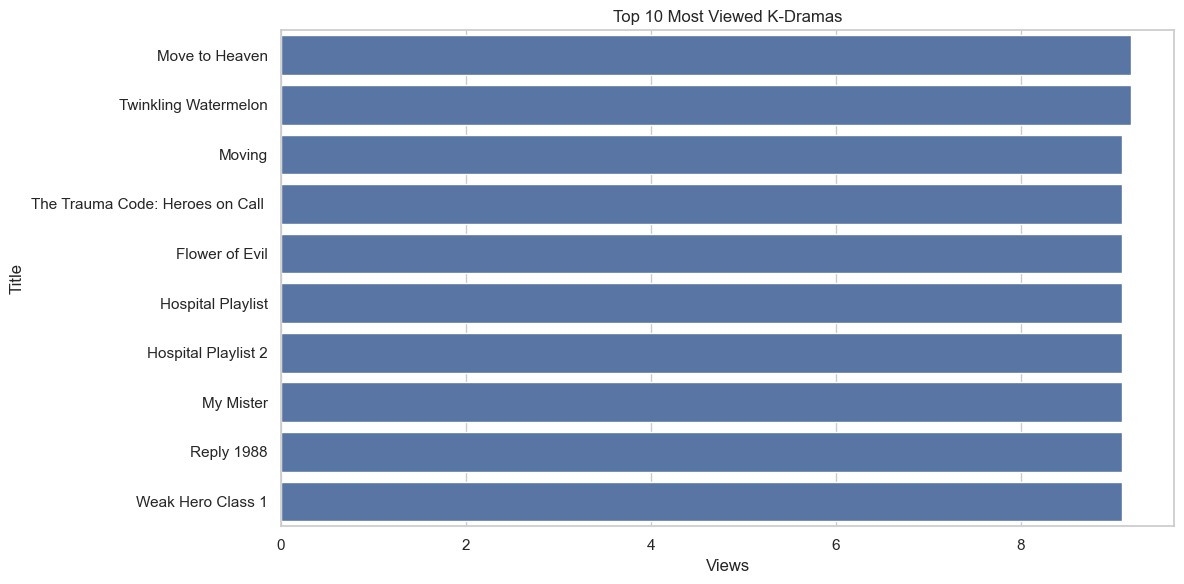

In [153]:
if 'Rating' in df.columns:
    top_views = df.sort_values(by='Rating', ascending=False).head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Rating', y='Title', data=top_views)
    plt.title("Top 10 Most Viewed K-Dramas")
    plt.xlabel("Views")
    plt.ylabel("Title")
    plt.tight_layout()
    plt.show()


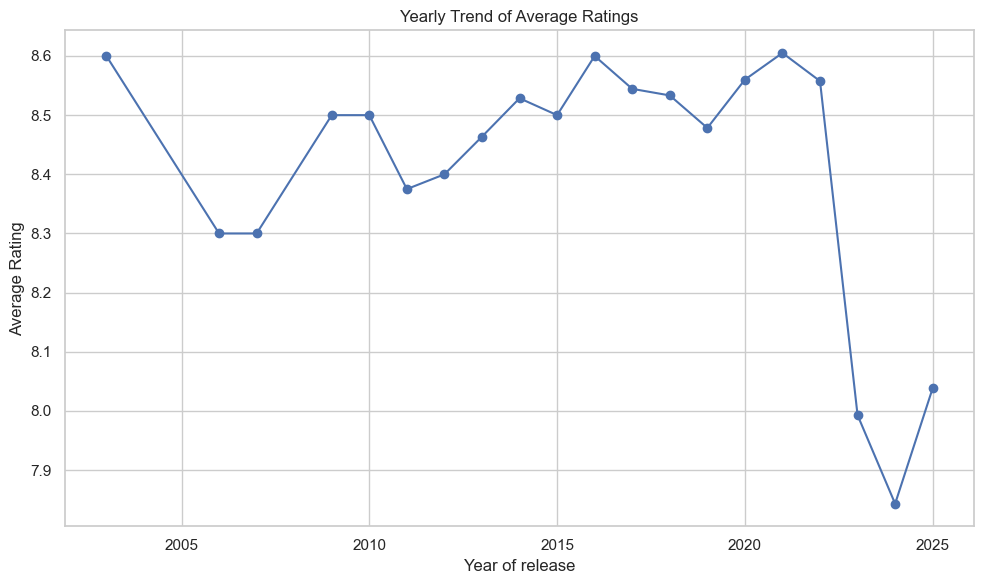

In [154]:
plt.figure(figsize=(10, 6))
df.groupby('Year of release')['Rating'].mean().plot(marker='o')
plt.title("Yearly Trend of Average Ratings")
plt.xlabel("Year of release")
plt.ylabel("Average Rating")
plt.grid(True)
plt.tight_layout()
plt.show()


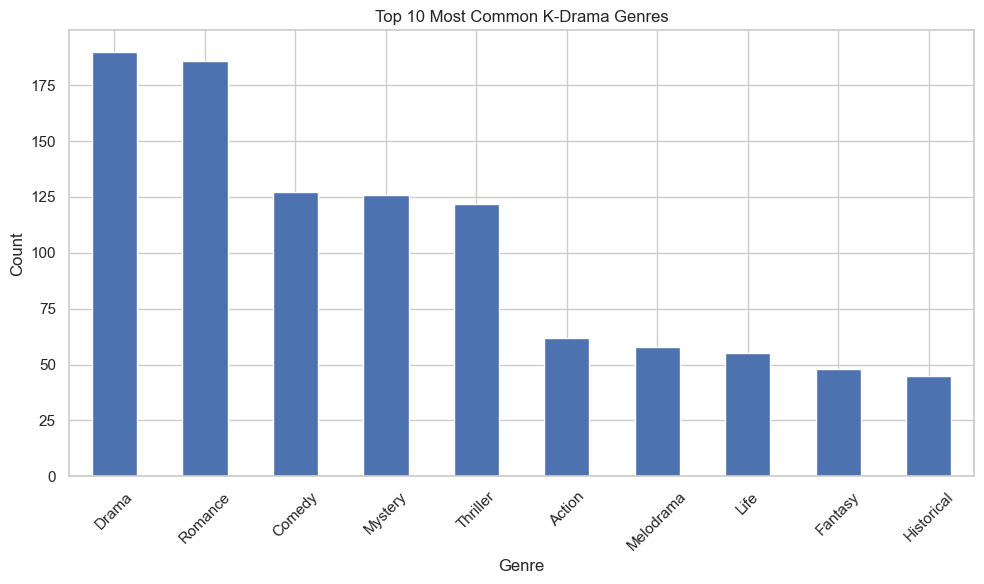

In [155]:
from collections import Counter

# Split genre strings and count frequencies
all_genres = df['Genre'].dropna().apply(lambda x: [g.strip() for g in x.split(',')])
genre_flat = [genre for sublist in all_genres for genre in sublist]
genre_counts = pd.Series(Counter(genre_flat)).sort_values(ascending=False)

# Plot top 10 genres
plt.figure(figsize=(10, 6))
genre_counts.head(10).plot(kind='bar')
plt.title("Top 10 Most Common K-Drama Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


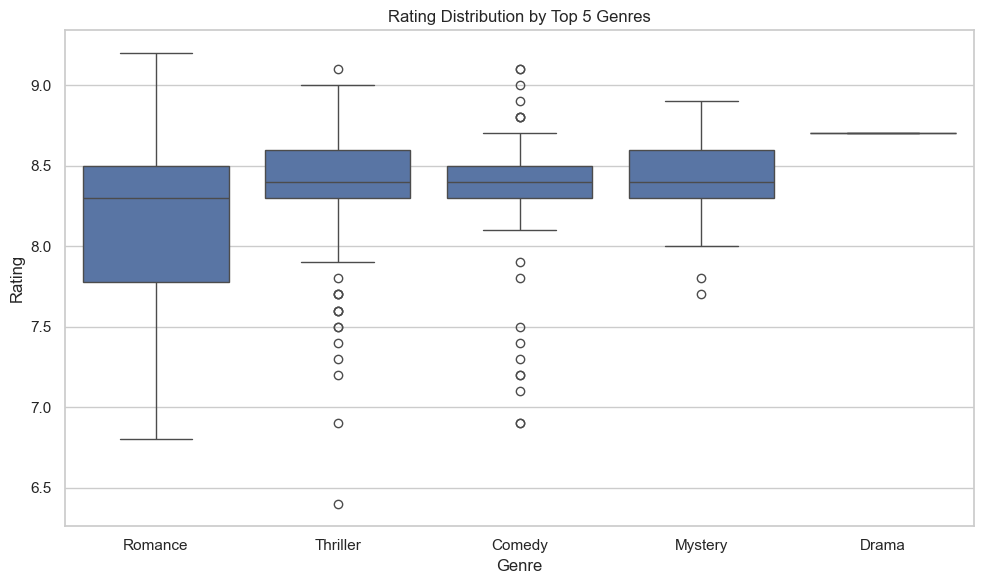

In [156]:
top5_genres = genre_counts.head(5).index.tolist()

# Create a new column with the first genre only
df['Primary Genre'] = df['Genre'].apply(lambda x: x.split(',')[0].strip() if pd.notna(x) else None)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Primary Genre', y='Rating', data=df[df['Primary Genre'].isin(top5_genres)])
plt.title("Rating Distribution by Top 5 Genres")
plt.xlabel("Genre")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()


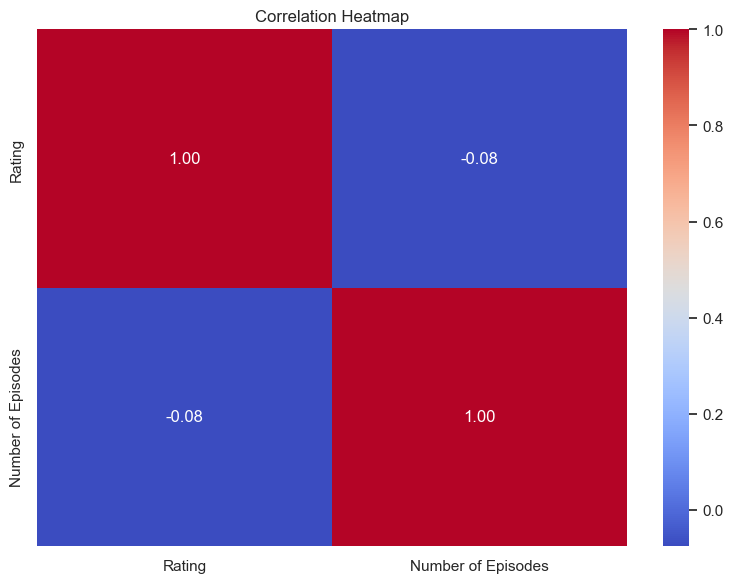

In [157]:
plt.figure(figsize=(8, 6))
corr = df[['Rating', 'Number of Episodes']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


In [158]:
df['Genre List'] = df['Genre'].dropna().apply(lambda x: [g.strip() for g in x.split(',')])
df[['Title', 'Genre List']].head()

,Title,Genre List
0,Move to Heaven,"[Life, Drama, Family]"
1,Twinkling Watermelon,"[Romance, Youth, Drama, Fantasy]"
2,Moving,"[Action, Thriller, Mystery, Supernatural]"
3,The Trauma Code: Heroes on Call,"[Action, Comedy, Drama, Medical]"
4,Flower of Evil,"[Thriller, Romance, Crime, Melodrama]"
